In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot

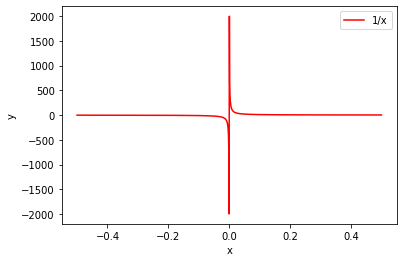

In [3]:
# define the dataset
no_of_samples=1000
x = np.linspace(-.5, .5, no_of_samples)[:, np.newaxis]
y = np.divide(1,x)
plt.figure()
plt.plot(x, y, 'r-')
plt.legend(['1/x'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

MSE: 9576.491642


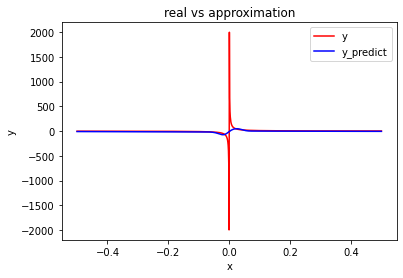

MSE: 9269.594940


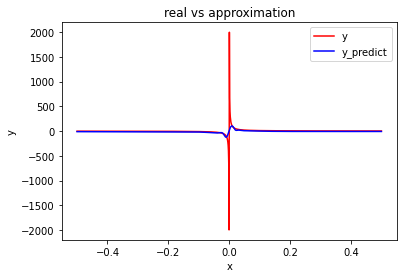

MSE: 9044.528703


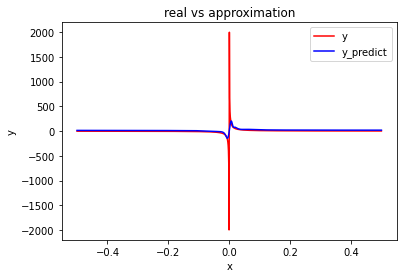

In [4]:
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
#print(x.min(), x.max(), y.min(), y.max())
# design the neural network model
model = Sequential()
model.add(Dense(30, input_dim=1, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(Dense(1))
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')
# ft the model on the training dataset
for i in range(3):
  model.fit(x, y, epochs=10000, batch_size=10, verbose=0)
  # make predictions for the input data
  yhat = model.predict(x)
  # inverse transforms
  x_plot = scale_x.inverse_transform(x)
  y_plot = scale_y.inverse_transform(y)
  yhat_plot = scale_y.inverse_transform(yhat)
  # report model error
  print('MSE: %.6f' % mean_squared_error(y_plot, yhat_plot))
  # plot x vs y
  plt.figure()
  plt.plot(x_plot, y_plot, 'r-', x_plot, yhat_plot, 'b-')
  plt.title('real vs approximation')
  plt.legend(['y','y_predict'])
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()